In [115]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [116]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32,9.0,3,3,17,2,5,1
1,3,27,13.0,3,1,14,3,4,1
2,4,22,2.5,0,1,16,3,5,1
3,4,37,16.5,4,3,16,5,5,1
4,5,27,9.0,1,1,14,3,4,1


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [118]:
X = pd.get_dummies(data, columns=['occupation', 'occupation_husb', 'religious'])
del X['affair']
y = data['affair']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
model = LogisticRegression()

In [120]:
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

In [123]:
zip(predictions[:, 1], y_test)

[(0.64583193796528038, 0),
 (0.075906148028446599, 0),
 (0.2704606033743272, 0),
 (0.26938542699540474, 0),
 (0.26433391263337475, 1),
 (0.1443590034736055, 0),
 (0.17840859560894495, 0),
 (0.21871761029690232, 0),
 (0.75293068528621931, 1),
 (0.2694630112685994, 0),
 (0.11209927315788928, 0),
 (0.18717054508217956, 0),
 (0.081787486664569364, 0),
 (0.31112116452733868, 0),
 (0.72844717639129752, 1),
 (0.59166930758753922, 0),
 (0.2866959159979755, 0),
 (0.72154738337481017, 1),
 (0.29496805149000005, 0),
 (0.15667051339992993, 0),
 (0.21615228840070505, 1),
 (0.46233686791577172, 1),
 (0.076832478911577434, 1),
 (0.4580271305566268, 1),
 (0.17649937816203454, 0),
 (0.17432766952598117, 0),
 (0.40764807016474019, 0),
 (0.37999516823256363, 0),
 (0.24757102606750717, 0),
 (0.11183807376741733, 0),
 (0.14515577555535472, 0),
 (0.30099175328218625, 1),
 (0.2031958394620407, 0),
 (0.49666840206163682, 1),
 (0.620089795020765, 1),
 (0.39304622941583794, 1),
 (0.10972962012089897, 0),
 (0.18

In [124]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [125]:
precision_recall_curve?

In [126]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

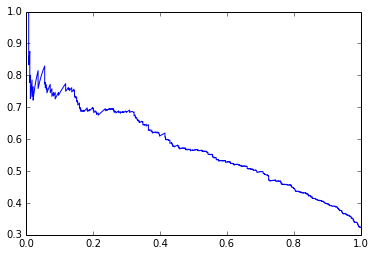

In [127]:
plt.plot(re, pr)

In [128]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [129]:
roc_curve?

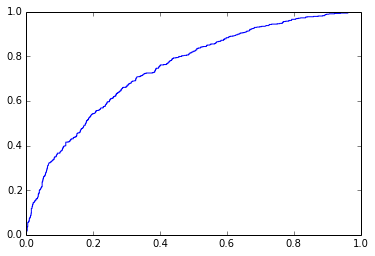

In [130]:
plt.plot(fpr, tpr)

In [131]:
from sklearn.metrics import roc_auc_score

In [133]:
roc_auc_score(y_test, predictions[:, 1])

0.74599485915786667

In [134]:
from sklearn.cross_validation import cross_val_score

In [135]:
scores = cross_val_score(LogisticRegression(), X, y, cv=10, scoring='f1')

In [136]:
scores.var()

0.0012219542632937097